In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='quality', ylabel='count'>

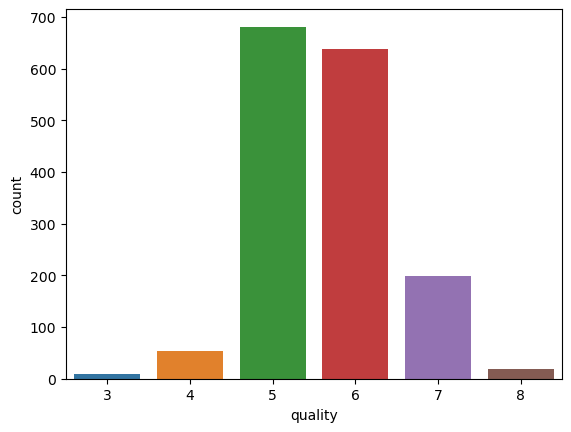

In [21]:
sns.countplot(data,x='quality')

# Assign X & Y

In [22]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [23]:
x=data.iloc[:,:-1]

In [25]:
y=data.iloc[:,-1:]

In [26]:
x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print('***************Training Data Shape**********.........\n')
print('Training data-X- Shape: \t',xtrain.shape)
print()
print('Training data-y- Shape: \t', ytrain.shape)
print()
print('****************Testing Data Shape******************\n')
print('Testing data(x-Input) Shape: \t', xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

***************Training Data Shape**********.........

Training data-X- Shape: 	 (1279, 11)

Training data-y- Shape: 	 (1279, 1)

****************Testing Data Shape******************

Testing data(x-Input) Shape: 	 (320, 11)

Testing data(y-Outcome) Shape:	 (320, 1)


In [32]:
#Train the model

knn_model=KNeighborsClassifier(n_neighbors=3)
print('**********************KNN Classifier Model**************')
print('Training Phase\n')
knn_model.fit(xtrain, ytrain)
print('Training is completed')
print('=' *100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are:\n', ypred)
print('Test is also done')
print()
print('-'*100)

**********************KNN Classifier Model**************
Training Phase

Training is completed

Testing Phase

Prdicted Class Labels are:
 [7 5 4 5 6 5 6 6 5 5 4 6 6 6 5 7 6 6 6 4 4 6 6 6 5 7 5 5 7 6 5 5 5 5 5 5 6
 6 7 4 5 5 6 6 5 6 5 5 5 5 5 5 5 5 7 5 5 5 5 5 6 6 6 6 6 6 7 6 6 4 5 5 5 5
 5 5 5 5 5 5 6 4 7 4 7 5 5 6 5 6 7 5 6 4 4 6 5 5 5 5 6 5 3 5 5 6 5 6 6 6 5
 5 5 6 5 6 5 6 6 6 5 5 6 5 7 5 6 4 6 5 6 5 5 6 7 5 6 5 5 6 5 6 6 6 3 5 5 5
 6 5 7 6 5 5 7 4 7 5 6 6 5 5 6 5 7 6 7 5 6 5 6 6 7 6 5 5 5 5 5 6 5 6 5 6 5
 7 5 5 6 6 4 5 6 4 4 6 5 6 6 7 6 5 5 5 5 5 6 7 5 6 7 4 5 6 5 7 6 5 6 5 6 6
 5 7 5 5 5 6 5 5 5 5 5 5 5 5 3 6 5 5 5 7 5 6 5 5 5 5 5 6 5 5 5 5 7 6 5 5 6
 6 5 6 5 6 5 7 5 5 5 5 5 6 5 6 5 5 5 5 6 6 3 6 5 5 7 5 4 5 6 7 7 6 5 6 3 5
 6 5 7 5 7 6 7 6 6 5 6 6 5 7 5 5 7 5 5 6 5 6 5 6]
Test is also done

----------------------------------------------------------------------------------------------------


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [33]:
print('Accuracy Score: \t', accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n', classification_report(ytest,ypred))

Accuracy Score: 	 0.503125

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 2  1  3  3  0  0]
 [ 1  6 84 25  6  0]
 [ 1 10 63 62 11  0]
 [ 1  0  9 12 14  0]
 [ 0  0  0  1  4  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.11      0.08         9
           5       0.53      0.69      0.60       122
           6       0.60      0.42      0.49       147
           7       0.40      0.39      0.39        36
           8       0.00      0.00      0.00         5

    accuracy                           0.50       320
   macro avg       0.26      0.27      0.26       320
weighted avg       0.52      0.50      0.50       320



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [35]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Scaling the Data

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x = sc.fit_transform(x)

In [37]:
sc_x.shape

(1599, 11)

In [38]:
sc_x[0]

array([-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
       -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
       -0.96024611])

# split the scaled data

In [39]:
xtrain, xtest, ytrain, ytest=train_test_split(sc_x,y,test_size=0.2,random_state=2)
print('***************Training Data Shape**********.........\n')
print('Training data-X- Shape: \t',xtrain.shape)
print()
print('Training data-y- Shape: \t', ytrain.shape)
print()
print('****************Testing Data Shape******************\n')
print('Testing data(x-Input) Shape: \t', xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

***************Training Data Shape**********.........

Training data-X- Shape: 	 (1279, 11)

Training data-y- Shape: 	 (1279, 1)

****************Testing Data Shape******************

Testing data(x-Input) Shape: 	 (320, 11)

Testing data(y-Outcome) Shape:	 (320, 1)


# Train the scaled data

In [45]:
#Train the model

knn_model=KNeighborsClassifier(n_neighbors=3)
print('**********************KNN Classifier Model**************')
print('Training Phase\n')
knn_model.fit(xtrain, ytrain)
print('Training is completed')
print('=' *100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are:\n', ypred)
print('Test is also done')
print()
print('-'*100)

**********************KNN Classifier Model**************
Training Phase

Training is completed

Testing Phase

Prdicted Class Labels are:
 [6 5 5 6 6 6 4 5 5 5 6 5 5 6 5 5 6 7 6 6 6 6 6 6 5 7 5 6 7 5 5 6 6 6 6 5 6
 5 6 6 5 6 5 5 5 5 5 6 5 6 5 5 5 6 6 5 7 5 6 6 4 5 6 5 6 6 7 6 5 6 5 6 6 5
 5 6 6 5 6 5 5 7 5 5 7 6 7 6 5 5 6 5 6 5 5 6 5 5 5 5 6 6 3 4 6 6 6 5 6 7 6
 5 6 5 6 6 5 6 6 6 6 5 6 6 5 5 6 5 6 5 5 5 7 5 6 6 6 5 5 7 6 5 6 6 5 5 4 5
 6 4 6 6 6 6 6 6 6 5 6 6 5 5 6 5 6 6 7 6 3 5 6 6 7 6 6 6 6 6 5 6 5 6 5 6 5
 4 5 5 6 6 6 7 5 5 5 6 5 5 5 7 5 5 5 5 5 5 6 7 6 5 7 5 5 5 7 5 6 5 5 6 5 6
 4 6 6 5 6 6 6 6 5 4 5 5 6 5 6 6 4 5 7 6 6 6 5 6 6 6 5 7 6 5 6 5 7 5 5 4 6
 6 6 5 5 5 6 6 5 5 6 6 5 5 5 5 5 5 6 5 6 5 5 6 5 6 7 5 5 5 7 7 7 7 5 5 3 5
 6 6 4 6 7 6 7 5 6 7 5 5 5 7 5 5 6 5 5 3 5 6 6 5]
Test is also done

----------------------------------------------------------------------------------------------------


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# performance Measures with Scaled data

In [46]:
print('Accuracy Score: \t', accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n', classification_report(ytest,ypred))

Accuracy Score: 	 0.5375

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 2  1  4  2  0  0]
 [ 1  5 75 40  1  0]
 [ 0  5 50 81 11  0]
 [ 1  0 10 10 15  0]
 [ 0  0  0  2  3  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.11      0.10         9
           5       0.54      0.61      0.57       122
           6       0.60      0.55      0.57       147
           7       0.50      0.42      0.45        36
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.29      0.28      0.28       320
weighted avg       0.54      0.54      0.54       320



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train the data with no of neighbours=4

In [48]:
#Train the model

knn_model=KNeighborsClassifier(n_neighbors=4)
print('**********************KNN Classifier Model**************')
print('Training Phase\n')
knn_model.fit(xtrain, ytrain)
print('Training is completed')
print('=' *100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are:\n', ypred)
print('Test is also done')
print()
print('-'*100)

**********************KNN Classifier Model**************
Training Phase

Training is completed

Testing Phase

Prdicted Class Labels are:
 [6 7 5 6 6 6 4 6 5 5 6 5 5 6 5 7 6 7 6 6 6 5 6 8 5 7 5 6 7 5 5 6 5 6 6 5 5
 6 6 6 5 6 5 5 5 5 5 6 5 6 5 5 5 6 6 5 7 5 6 6 5 5 6 5 6 6 7 6 7 6 5 6 6 5
 5 6 6 6 6 5 5 7 6 5 7 6 5 6 5 5 6 5 5 5 5 5 5 5 5 5 6 5 5 6 6 8 6 5 5 7 6
 5 5 5 6 6 5 6 6 6 6 6 6 6 7 5 7 7 6 5 5 5 7 5 6 5 6 6 5 7 6 5 6 6 5 5 4 5
 6 6 6 6 6 5 6 6 6 5 5 6 5 5 6 5 6 6 7 6 5 5 6 6 7 6 6 6 5 6 5 6 5 5 5 6 5
 5 5 5 6 6 6 7 5 5 5 5 5 5 5 7 5 5 5 5 5 5 6 7 6 5 7 5 6 6 7 5 6 5 5 5 5 6
 6 6 6 5 6 6 6 6 5 3 5 5 6 5 6 6 5 5 7 6 6 7 5 6 5 6 5 7 5 5 6 5 7 5 5 6 6
 6 6 7 5 5 5 6 5 5 5 6 5 5 5 5 5 5 4 5 6 5 5 6 5 6 7 5 5 7 7 6 7 7 5 5 3 5
 7 6 6 5 6 5 5 5 6 6 5 5 5 7 5 5 6 5 5 4 5 6 5 5]
Test is also done

----------------------------------------------------------------------------------------------------


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# performance Measures with Scaled data and no of neighbours = 4

In [49]:
print('Accuracy Score: \t', accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n', classification_report(ytest,ypred))

Accuracy Score: 	 0.55625

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  2  6  1  0  0]
 [ 1  1 85 33  2  0]
 [ 0  1 53 76 15  2]
 [ 1  0  9 11 15  0]
 [ 0  0  0  2  3  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.22      0.31         9
           5       0.56      0.70      0.62       122
           6       0.61      0.52      0.56       147
           7       0.43      0.42      0.42        36
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.35      0.31      0.32       320
weighted avg       0.56      0.56      0.55       320



# Train the data with no of neighbours=5

In [55]:
#Train the model

knn_model=KNeighborsClassifier(n_neighbors=5)
print('**********************KNN Classifier Model**************')
print('Training Phase\n')
knn_model.fit(xtrain, ytrain)
print('Training is completed')
print('=' *100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are:\n', ypred)
print('Test is also done')
print()
print('-'*100)

**********************KNN Classifier Model**************
Training Phase

Training is completed

Testing Phase

Prdicted Class Labels are:
 [6 6 5 6 5 6 6 5 5 5 6 5 5 6 5 7 6 7 6 6 6 6 6 7 5 7 5 7 7 5 5 6 6 6 6 5 5
 6 6 6 5 5 6 5 5 5 6 6 5 6 5 5 5 6 6 5 7 5 6 6 5 6 6 5 6 6 6 7 7 6 5 6 6 5
 5 6 6 6 7 5 5 7 6 5 7 6 5 6 5 5 6 6 6 5 5 5 5 5 6 5 6 5 5 6 6 7 6 5 6 5 6
 5 5 5 6 7 5 6 6 6 6 6 6 6 7 5 7 7 6 5 5 5 7 5 6 5 6 6 5 7 6 5 6 6 5 5 7 5
 6 6 6 6 6 5 5 6 7 5 5 6 5 5 6 5 6 7 7 6 5 5 6 6 7 6 6 7 5 6 5 6 5 6 5 6 5
 5 5 5 6 6 6 7 5 6 5 6 5 5 5 7 5 5 5 5 5 5 6 7 6 5 7 5 6 5 7 5 6 5 5 5 5 6
 5 6 6 6 6 6 6 6 5 6 5 5 6 5 5 6 5 5 7 6 6 7 5 6 5 6 5 7 5 5 6 5 7 5 5 6 6
 6 6 6 5 5 5 6 5 5 6 6 5 5 5 7 5 5 4 5 6 5 5 6 5 6 6 5 5 6 7 7 7 6 5 5 6 5
 7 6 4 5 7 5 5 5 6 6 5 5 5 7 5 5 6 5 5 4 5 6 5 5]
Test is also done

----------------------------------------------------------------------------------------------------


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# performance Measures with Scaled data and no of neighbours = 5

In [57]:
print('Accuracy Score: \t', accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n', classification_report(ytest,ypred))

Accuracy Score: 	 0.546875

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  1  6  2  0  0]
 [ 0  2 80 38  2  0]
 [ 0  0 52 77 18  0]
 [ 0  0  8 11 17  0]
 [ 0  0  0  1  4  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.11      0.17         9
           5       0.55      0.66      0.60       122
           6       0.59      0.52      0.56       147
           7       0.41      0.47      0.44        36
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.31      0.29      0.29       320
weighted avg       0.54      0.55      0.54       320



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
